In [2]:
import os
import os.path as osp

import sys
sys.path.append("..")

import core

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [5]:
conf = core.conf.readconfyaml.read("../conf/train.yaml")
print(conf)
print(conf.batch_size)
print(conf.num_epochs)
print(conf.model)

conf.model.in_channels = 10

print(conf.model)

{'batch_size': 8, 'num_epochs': 10, 'model': {'num_cls': 10, 'dropout': 0.5}}
8
10
{'num_cls': 10, 'dropout': 0.5}
{'num_cls': 10, 'dropout': 0.5, 'in_channels': 10}


torch.Size([1, 64, 512, 5])


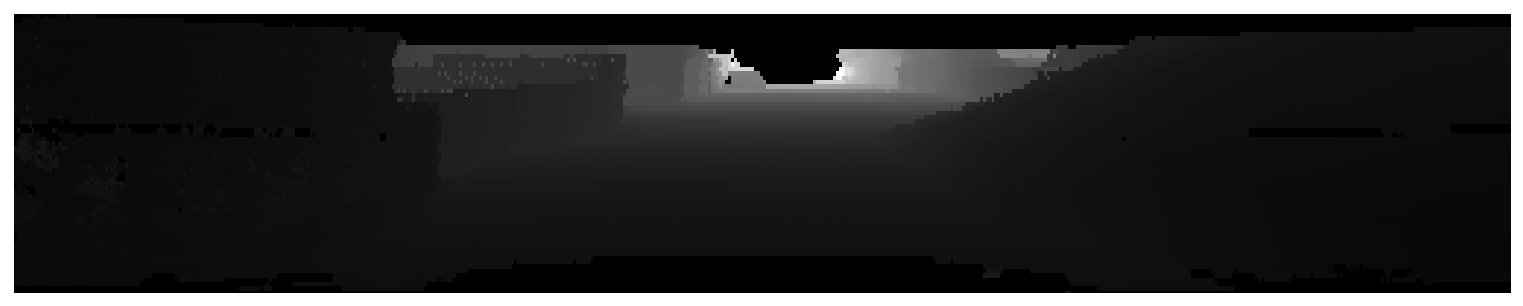

In [16]:
import sys
sys.path.append("..")

import torch
import torch.utils.data

import matplotlib.pyplot as plt

import core

train_loader = torch.utils.data.DataLoader(
    core.dataset.KITTISpherical(
        "../data", "train"
    ),
    batch_size=1,
    shuffle=True,
    num_workers=4
)

for iter, (fmap, gdth) in enumerate(train_loader):
    print(fmap.shape)

    img = fmap[0][:, :, 3]
    # img = gdth[0]
    fig = plt.figure(figsize=(12, 6), dpi=128, tight_layout=True)
    plt.axis([512, 0, 0, 64])
    plt.axis("off")
    plt.imshow(img, cmap="gray", aspect=1.5, interpolation='nearest')
    plt.savefig("test.png")
    break